In [1]:
import pandas as pd#importing important Libraries
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df_train=pd.read_csv(r"C:\Users\Administrator\Downloads\train_ctrUa4K.csv")# loading datasets train file  
df_test=pd.read_csv(r"C:\Users\Administrator\Downloads\test_lAUu6dG.csv")# loading datasets test file 

In [3]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df_test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:

df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Visualizations

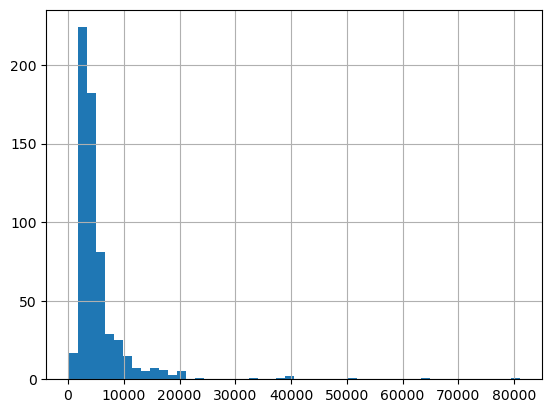

In [7]:
df_train['ApplicantIncome'].hist(bins=50)
plt.show()

<Axes: >

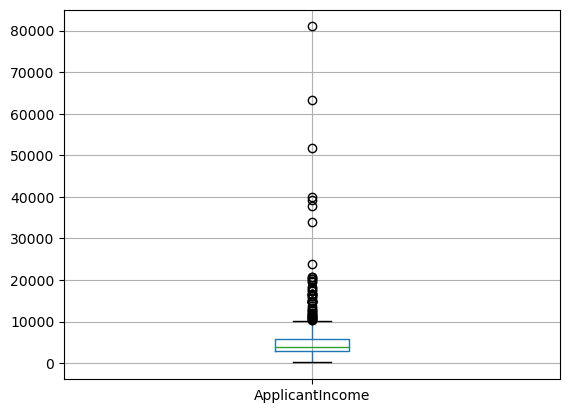

In [8]:
df_train.boxplot(column='ApplicantIncome')

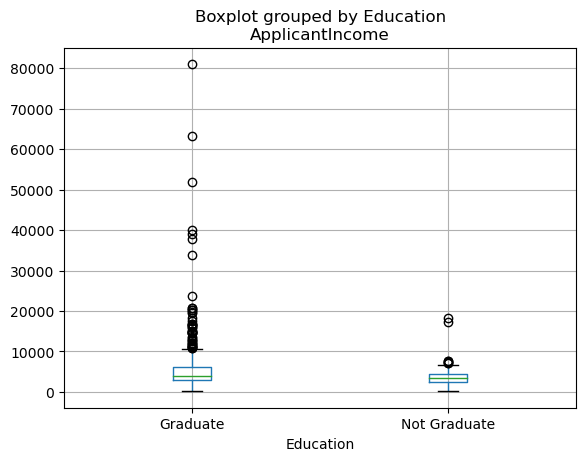

In [9]:
df_train.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

<Axes: >

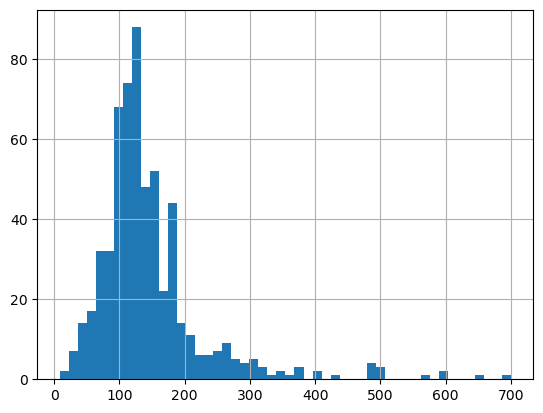

In [10]:
df_train['LoanAmount'].hist(bins=50)

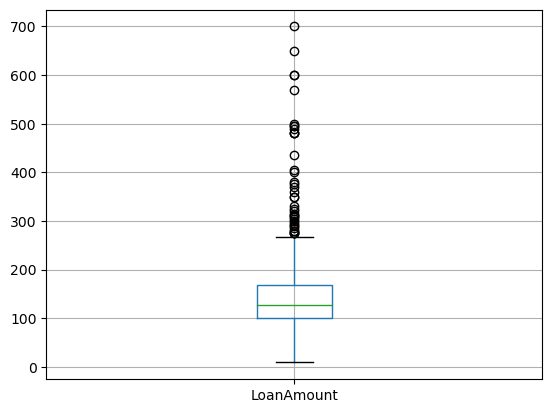

In [11]:
df_train.boxplot(column='LoanAmount')
plt.show()

In [12]:
Credit_History_value_count = df_train['Credit_History'].value_counts(ascending=True)
Credit_History_value_count

Credit_History
0.0     89
1.0    475
Name: count, dtype: int64

In [13]:
Credit_History_probability = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

#Credit_History_probability = Credit_History_probability['Loan_Status']
Credit_History_probability


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


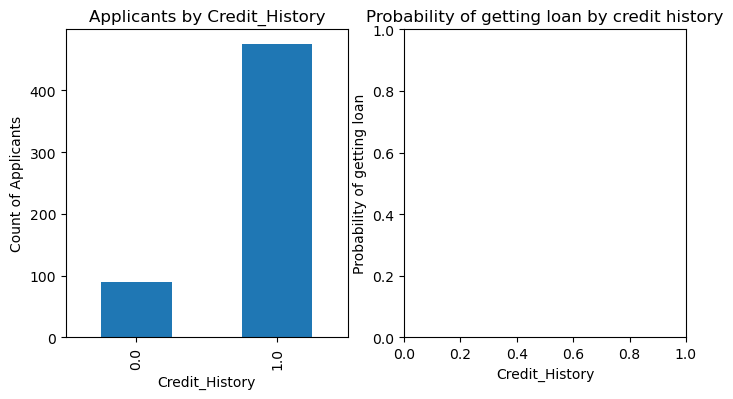

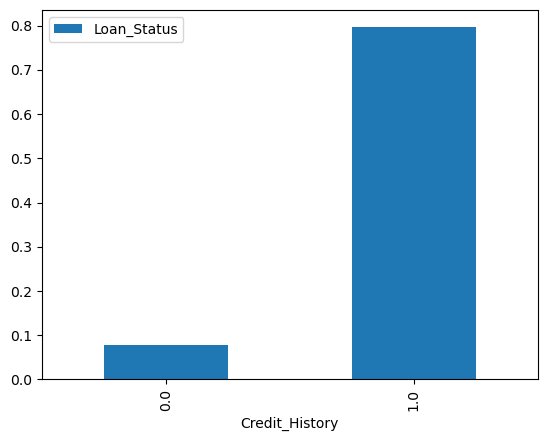

In [14]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
Credit_History_value_count.plot(kind='bar')

ax2 = fig.add_subplot(122)
Credit_History_probability.plot(kind = 'bar')

ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

In [15]:
gender_value_count = df_train['Gender'].value_counts(ascending=True)
gender_value_count


Gender
Female    112
Male      489
Name: count, dtype: int64

In [16]:

gender_value_probability = df_train.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#gender_value_probability = gender_value_probability['Loan_Status']
gender_value_probability

,Loan_Status
Gender,
Female,0.669643
Male,0.693252


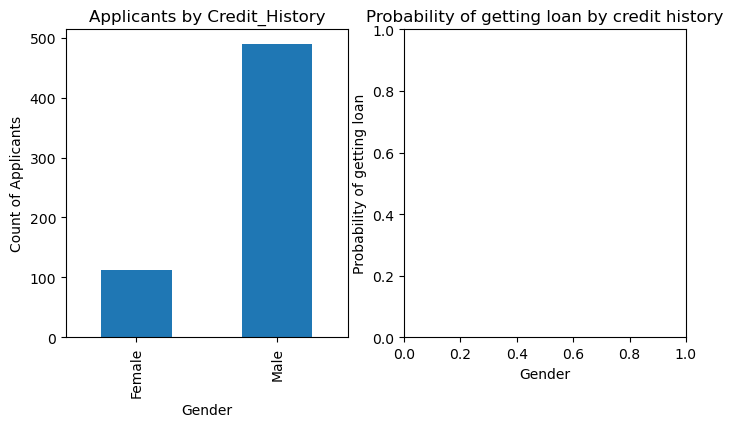

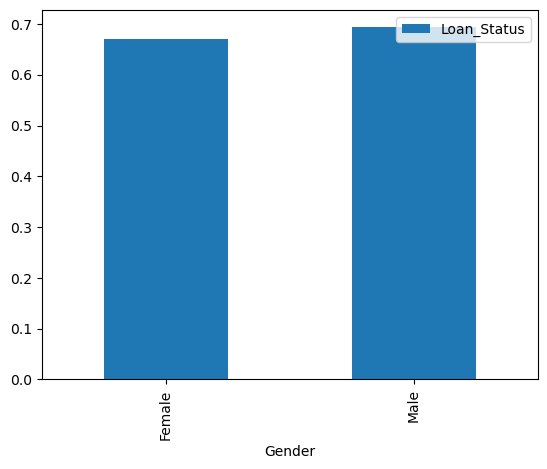

In [17]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
gender_value_count.plot(kind='bar')

ax2 = fig.add_subplot(122)
gender_value_probability.plot(kind = 'bar')

ax2.set_xlabel('Gender')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

In [18]:
education_value_count = df_train['Education'].value_counts(ascending=True)
education_value_count


Education
Not Graduate    134
Graduate        480
Name: count, dtype: int64

In [19]:
education_value_probability = df_train.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#education_value_probability = education_value_probability['Loan_Status']
education_value_probability

,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940


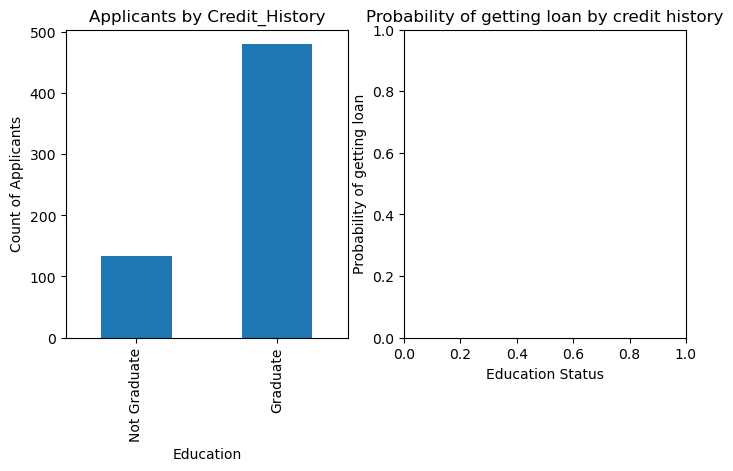

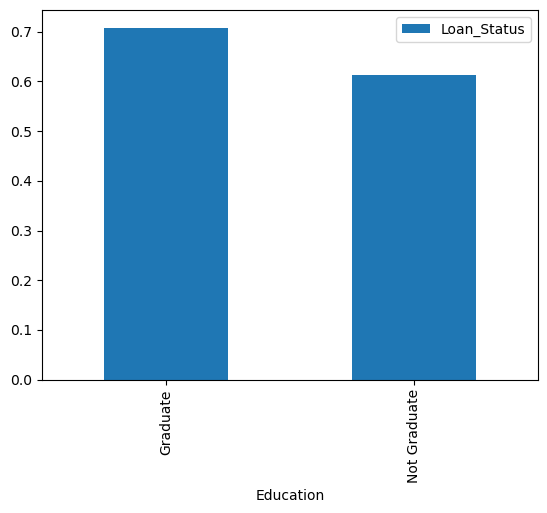

In [20]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
education_value_count.plot(kind='bar')

ax2 = fig.add_subplot(122)
education_value_probability.plot(kind = 'bar')

ax2.set_xlabel('Education Status')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

Null Values

In [21]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
if (df_train['LoanAmount'] == 0).any():
    print('Number of records with 0 in Loan Amount (Train Data): %d' % (total_data['LoanAmount'] == 0).sum())
else:
    print('No records with 0 in Loan Amount (Train Data)')

No records with 0 in Loan Amount (Train Data)


In [24]:
# For Test Data
if (df_test['LoanAmount'] == 0).any():
    print('Number of records with 0 in Loan Amount (Test Data): %d' % (test_data['LoanAmount'] == 0).sum())
else:
    print('No records with 0 in Loan Amount (Test Data)')

No records with 0 in Loan Amount (Test Data)


In [25]:
df_train['Self_Employed'].value_counts()


Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [26]:
df_test['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [27]:
df_train['Self_Employed'].fillna('No',inplace=True)

In [28]:
df_test['Self_Employed'].fillna('No',inplace=True)

In [29]:
# For Train Data
table = df_train[df_train['Loan_Status'] == 'Y'].pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',
    aggfunc=np.median)
table




Education,Graduate,Not Graduate
Self_Employed,,
No,128.0,111.0
Yes,160.0,127.5


In [30]:
# For Train Data
table_train = df_train[df_train['Loan_Status'] == 'Y'].pivot_table(
    values='LoanAmount',
    index='Self_Employed',
    columns='Education',
    aggfunc=np.median
)
print("Pivot Table for Train Data:")
print(table_train)




Pivot Table for Train Data:
Education      Graduate  Not Graduate
Self_Employed                        
No                128.0         111.0
Yes               160.0         127.5


In [31]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_train['LoanAmount'].mode()[0], inplace=True)

In [32]:
df_train['Loan_Amount_Term'].value_counts().head(4)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
Name: count, dtype: int64

In [33]:
df_test['Loan_Amount_Term'].value_counts().head(4)

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
Name: count, dtype: int64

In [34]:
df_train['Loan_Amount_Term'].fillna(360, inplace=True)

In [35]:
df_test['Loan_Amount_Term'].fillna(360, inplace=True)

In [36]:
df_train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [37]:
df_test['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [38]:
df_train['Gender'].fillna('Male', inplace=True)
df_test['Gender'].fillna('Male', inplace=True)

In [39]:
df_train['Married'].value_counts()


Married
Yes    398
No     213
Name: count, dtype: int64

In [40]:
df_test['Married'].value_counts()


Married
Yes    233
No     134
Name: count, dtype: int64

In [41]:
df_train['Married'].fillna('Yes', inplace=True)


In [42]:
df_test['Married'].fillna('Yes', inplace=True)

In [43]:
df_test['Dependents'].value_counts()


Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [44]:
df_train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [45]:
df_train['Dependents'].fillna(0, inplace=True)
df_test['Dependents'].fillna(0, inplace=True)

In [46]:
df_train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [47]:
df_test['Credit_History'].value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

In [48]:
df_train['Credit_History'].fillna(1, inplace=True)
df_test['Credit_History'].fillna(1, inplace=True)

In [49]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

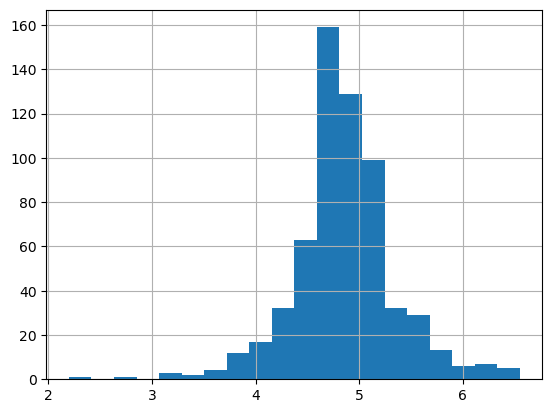

In [51]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)

<Axes: >

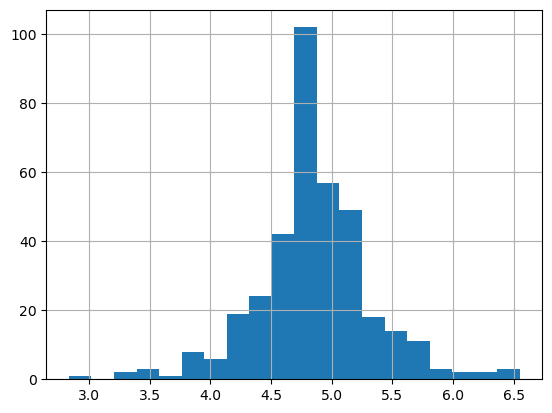

In [52]:
df_test['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_test['LoanAmount_log'].hist(bins=20)

<Axes: >

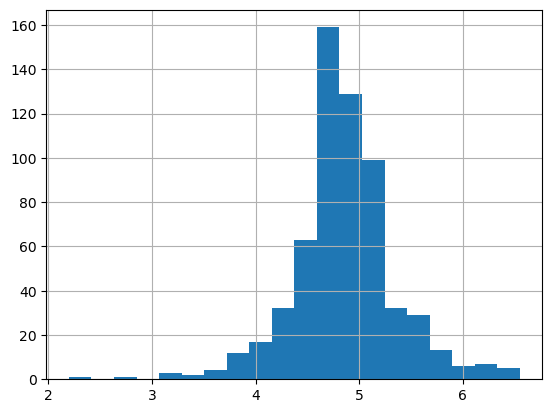

In [53]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])
df_train['LoanAmount_log'].hist(bins=20) 

<Axes: >

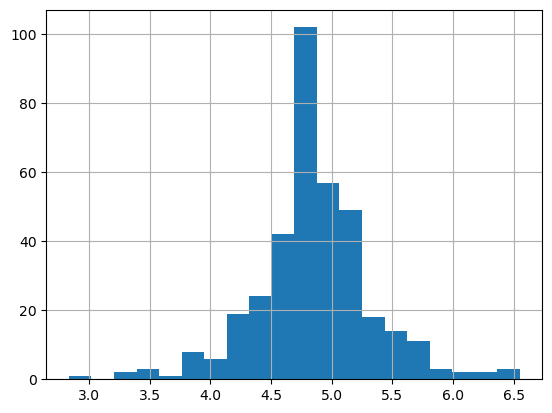

In [54]:
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])
df_test['LoanAmount_log'].hist(bins=20) 

In [55]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Modelling 

In [56]:
from copy import deepcopy

loan_id_backup_testset = deepcopy(df_test['Loan_ID']) # back up the loan IDs.


df_train = df_train.drop('Loan_ID', axis=1)
df_test = df_test.drop('Loan_ID', axis=1)


In [57]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'N': 0, 'Y': 1})


In [58]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1,4.787492,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [59]:
def get_categorical_cols(dataframe):
    cols = dataframe.columns
    num_cols = dataframe._get_numeric_data().columns
    categories = (set(cols) - set(num_cols))
    return categories

categorical_cols = get_categorical_cols(df_train)

le = LabelEncoder()
for i in categorical_cols:
    df_train[i] = le.fit_transform(df_train[i].astype(str))
    df_test[i] = le.fit_transform(df_test[i].astype(str))
    
# see how the dataset look now
print (df_train.head(5))

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       120.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  LoanAmount_log  TotalIncome  TotalIncome_log  
0              2            1        4

In [60]:
from numpy import nan as NaN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import csv
#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.naive_bayes as nb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [61]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.787492,5720,8.651724
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.852030,4576,8.428581
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,4.189655,6800,8.824678
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.787492,4886,8.494129
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.948760,3276,8.094378


In [62]:
x_train=df_train.drop(columns=['Loan_Status'])
x_train = df_train[['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 
                    'Property_Area', 'LoanAmount_log', 'TotalIncome_log']]

y_train=df_train['Loan_Status'].values

x_test=df_test[['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 
                    'Property_Area', 'LoanAmount_log', 'TotalIncome_log']].values

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)







In [64]:
# Model Training
svc_classifier=SVC(kernel='linear', C=1)
svc_classifier.fit(x_train,y_train)



# Model Evaluation on Validation Set
val_predictions = svc_classifier.predict(x_val)
accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.7886178861788617


In [65]:
test_predictions_svc = svc_classifier.predict(x_test)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [66]:
test_predictions_svc

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [67]:
sample=pd.read_csv(r"C:\Users\Administrator\Downloads\sample_submission_49d68Cx.csv")

In [68]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [69]:
df1=pd.DataFrame(test_predictions_svc,columns=["Loan_Status"])
df1.head(10)

,Loan_Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [70]:
df1=df1.replace(0,'N')
df1=df1.replace(1,'Y')
df1.head(20)

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,Y


In [71]:
sample=sample.drop(columns=['Loan_Status'],axis=1)


In [72]:
sample['Loan_Status']=df1['Loan_Status']

In [73]:
sample.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [74]:
sample.to_csv("svcfinal.csv",index=False)

In [76]:
sample.to_csv(r'C:\Users\Administrator\Documents\python\svcfinal.csv', index=False)